First, suppose that an ant wander randomly by taking steps (x, y), on per second, where at each step, x and y come from a normal distribution with a mean of 0 and a standard deviation of 1.0 mm. (Based on the methods of random walk,) I first plot a trace of the ant's path over the course of an hour.

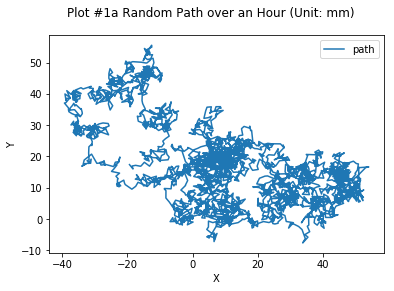

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def rstep(n):
    k = 1
    a = np.array([0])
    x = 0
    while k <= n:
        x += np.random.normal(0, 1)
        a = np.append(a, [x])
        k += 1
    return a

def rplot(n):
    x = rstep(n)
    y = rstep(n)
    plt.plot(x, y, label = "path")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show
    
fig = plt.figure()
fig.suptitle('Plot #1a Random Path over an Hour (Unit: mm)', fontsize = 12)
    
rplot(3600)
        

To get a better sense of how the random walk works, I demostrate the path in an animation. 

In [3]:
from celluloid import Camera
from matplotlib import animation

# OS and SYS will be used to ensure the 'ImageMagick' directory is found by matplotlib.
import os, sys

ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16-HDRI', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

# ensure the ".gif" creation works.
imgk_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16-HDRI', 'magick.exe')
plt.rcParams['animation.convert_path'] = imgk_path
if ff_path not in sys.path: sys.path.append(imgk_path)

fig = plt.figure()
camera = Camera(fig)

<Figure size 432x288 with 0 Axes>

In [ ]:
def randomAnimation(n):
    fig = plt.figure()
    camera = Camera(fig)
    
    x = rstep(n)
    y = rstep(n)
    
    i = 0
    while i < 3600:
        plt.plot(x, y, color = '#F5B041')
        plt.plot(x[i], y[i], 'o', color = '#641E16')
        plt.plot(x[0], y[0], 'o', color = '#28B463')
        plt.xlabel("X")
        plt.ylabel("Y")
        camera.snap()
        i = i + 30
    animation = camera.animate()
    animation.save('random2.gif', writer = 'imagemagick')

randomAnimation(3600)

Next, suppose that instead of performing path integration, when an ant found food, it just continued to wander with random walk until it got back to the nest. I will run a simulation and find the probability that an ant who finds food (after 1 hour of walking) will make its way back to (within 10 mm of) the nest over the course of the next hour. (I'm assuming that the ant stops after it reaches within 10 mm of the nest.) 

In [ ]:
def isback(Ax, Ay):
    k = 3600
    while k < Ax.size:
        x = Ax[k]
        y = Ay[k]
        k+= 1
        if x*x + y*y <= 100:
            return 1
    return 0

def probback(n):
    back = 0
    d = n
    while n > 0:
        n -= 1
        x = rstep(7200)
        y = rstep(7200)
        r = isback(x, y)
        back += r
    return back / d

probback(500)
        

from the simulation below, we can see that throughout the 500 trails I ran, the probalility that an ant who walked an hour aeay from its home can get back to its nest within the course of an hour is only less than 0.25. We can see that only depending on random walks to get back to its nest is not a good strategy. 

In the next simulations, I will explore the ant's strategy to perform path integration.

Consider when an ant is performing path integration, each step is "remembered" with a slight error. I denote the standard deviation on each component (x and y) with S, where each step is updated by an error factor of (ex, ey), and ex ~ Gaussian(0, S)

In [4]:
# a function to help calculate dx and dy in each step 
def difference(An):
    prev = np.append(0, An)
    curr = np.append(An, 0)
    arr = curr - prev
    return arr[1:-1]

a = np.arange(5)

print("test: the difference of array ", a, "is ", difference(a))

test: the difference of array  [0 1 2 3 4] is  [1 1 1 1]


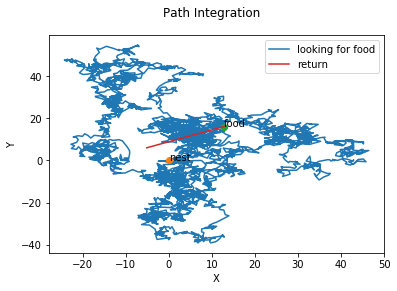

In [5]:
def returnplot(n, s):
    
    x = rstep(n)
    y = rstep(n)
    
    difx = difference(x)
    dify = difference(y)
    
    # (fx, fy) marks the position where the food is found
    fx = x[-1]
    fy = y[-1]
    
    dx = 0
    dy = 0
        
    for i in range(n - 1):
        # ex, ey denotes the error in each step
        ex = np.random.normal(0, s)
        ey = np.random.normal(0, s)
        dx =  dx + difx[i] + ex
        dy = dy + dify[i] + ey

    
    # x, y coordinates for return trip
    rx, ry = [], []
    rx = np.append(rx, fx)
    ry = np.append(ry, fy)
    
    sx = dx / n
    sy = dy / n
    
    for j in range(n - 1):
        rx = np.append(rx, rx[- 1] - sx)
        ry = np.append(ry, ry[- 1] - sy)
        
   
        
    plt.plot(x, y, label = "looking for food")
    plt.annotate("nest", xy=[x[0],y[0]])
    plt.plot([x[0]], [y[0]], 'o')
    
    plt.plot([x[-1]], [y[-1]], 'o')
    plt.annotate("food", xy=[x[-1],y[-1]])
    plt.plot(rx, ry, label = "return")
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show
    
fig = plt.figure()
fig.suptitle('Path Integration', fontsize = 12)
    
returnplot(3600, 0.05)
        

The plot above shows how an ant finds food with randon walk, and navigate back to its nest using path integration (in this case, s = 0.05)

To get a better uderstanding, I swiched up the color and made an animation (with the code below)

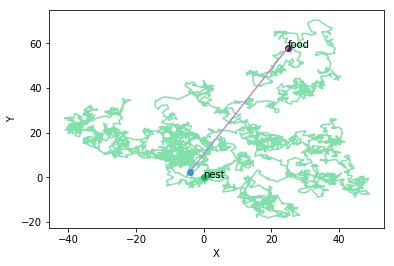

In [9]:
def returnAnimation(n, s):
    fig = plt.figure()
    camera = Camera(fig)
    
    x = rstep(n)
    y = rstep(n)
    
    difx = difference(x)
    dify = difference(y)
    
    # (fx, fy) marks the position where the food is found
    fx = x[-1]
    fy = y[-1]
    
    dx = 0
    dy = 0
        
    for i in range(n - 1):
        # ex, ey denotes the error in each step
        ex = np.random.normal(0, s)
        ey = np.random.normal(0, s)
        dx =  dx + difx[i] + ex
        dy = dy + dify[i] + ey

    
    # x, y coordinates for return trip
    rx, ry = [], []
    rx = np.append(rx, fx)
    ry = np.append(ry, fy)
    
    sx = dx / n
    sy = dy / n
    
    for j in range(n - 1):
        rx = np.append(rx, rx[- 1] - sx)
        ry = np.append(ry, ry[- 1] - sy)
        
    k = 0
    while k < n:
        plt.plot(x, y,color = '#82E0AA')
        plt.annotate("nest", xy=[x[0],y[0]])
        plt.plot([x[0]], [y[0]], 'o', color = '#28B463')
        
        plt.plot([x[-1]], [y[-1]], 'o', color = '#4A235A')
        plt.annotate("food", xy=[x[-1],y[-1]])
        plt.plot(rx, ry, color = '#BB8FCE')
        plt.xlabel("X")
        plt.ylabel("Y")
       
        
        plt.plot(rx[k], ry[k], 'o', color = '#3498DB')
        camera.snap()
        k = k + 100
  
    animation = camera.animate()
    animation.save('return.gif', writer = 'imagemagick')

returnAnimation(3600, 0.05)
        

In the next simulation, I calculate if the ant searches for an hour, finds food, and then searches for the nest by continuing to walk at random, what is the average closest distance it will come to the nest over the course of the next hour. (So I can compare the data with that of path integration.)

In [10]:
def mindis(Ax, Ay):
    k = 3600
    dis = np.sqrt(Ax**2+Ay**2)
    r = dis[3600:]
    m = r.min()
    return m

def avmin(n):
    m = 0
    d = n
    while n > 0:
        n -= 1
        x = rstep(7200)
        y = rstep(7200)
        r = mindis(x, y)
        m += r
    return m / d

avmin(500)


47.87231677212137

now, I do the same calculation for path integration.

the function avenddis(s, n) takes in standard deviation s and number of trails t, and out puts the average min distance from the trails

In [11]:
def estep(s, t): # returns the integrated error on one axis
    # s is the standard deviation in how correctly each step is remembered
    # t is time (in seconds)
    k = 1
    x = 0
    e = 0
    while k <= t:
        ex = np.random.normal(0, s)
        e += ex
        k += 1
    return e


def avenddis(s, n):
    ce = 0
    tr = n
    while n > 0:
        n -= 1
        ex = estep(s, 3600)
        ey = estep(s, 3600)
        e = np.sqrt(ex**2+ey**2)
        ce += e
    return ce / tr

avenddis(1, 500)


73.600157361954

In [12]:
avenddis(0.1, 500)

7.5601837044887015

In [13]:
avenddis(0.01, 500)

0.7614475283462501

In [14]:
avenddis(0.001, 500)

0.07569166921669024

In [15]:
avenddis(0.0001, 500)

0.007275241786670967

Now I plot the mean distance from the end point (in the return trip) to the nest as a function of s.

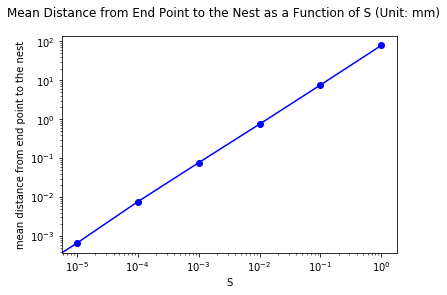

In [24]:
def displot(tr):
    x = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
    y = []
    for xi in x:
        y = np.append(y, avenddis(xi, tr))

    plt.xlabel("S")
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("mean distance from end point to the nest")
    plt.plot(x, y, 'bo-')

    plt.show
    
fig = plt.figure()
fig.suptitle('Mean Distance from End Point to the Nest as a Function of S (Unit: mm)', fontsize = 12)
    
displot(100)

Next, let’s assume that it requires exp(0.1/S) energy units for an ant to run an integrator with a standard deviation of S for an hour. Suppose further that if you end up at a distance d from the nest after your return trip, it will take you d^2 energy units to find the nest. By using another simulation, I plot the average energy expended while on a foraging trip (out for an hour and back) as a function of S.

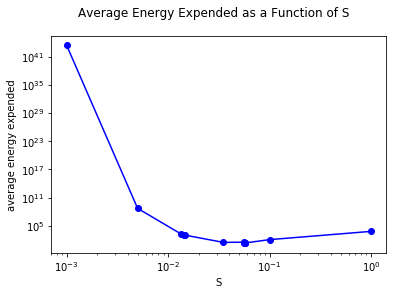

In [25]:
def dist(s):
    ex = estep(s, 3600)
    ey = estep(s, 3600)
    e = math.sqrt(ex**2+ey**2)
    return e

def avenergy(s, n):
    tr = n
    d, en, ce = 0, 0, 0
    while tr > 0:
        tr -= 1
        d = dist(s)
        en = math.exp(0.1 / s) + d**2
        ce += en
    return ce / n

def energyplot(n):
    x = [0.001, 0.005, 0.0133, 0.0142,0.0145, 0.035, 0.0554, 0.0555, 0.0566, 0.0567, 0.0572,0.1, 1]
    y = []
    for xi in x:
        y.append(avenergy(xi, n))

    plt.xlabel("S")
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("average energy expended")
    plt.plot(x, y, 'bo-')

    plt.show
    
fig = plt.figure()
fig.suptitle('Average Energy Expended as a Function of S', fontsize = 12)
    
energyplot(10)
    

Zooming in to see the minimum interval

[0.01, 0.1, 0, 10000]

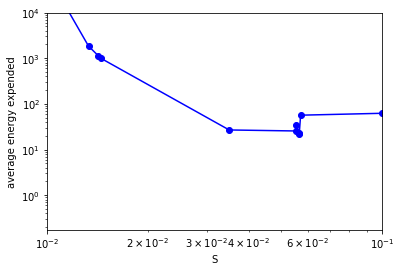

In [26]:
energyplot(10)
plt.axis([0.01, 0.1, 0, 10000])

According the the plot above, I find the minimum of the energy expenditure is when the standard deviation for path integration is in the range (0.04, 0.06)